In [85]:
# Import dependencies
import time
import numpy as np
import matplotlib.pyplot as plt

# Put Barrier Options

## 'Up' Barrier Options

In [86]:
# Initialise parameters
S0 = 100      # initial stock price
K = 100       # strike price
T = 1         # time to maturity in years
H = 150       # up-and-out barrier price/value
r = 0.01      # annual risk-free rate
vol = 0.2     # volatility (%)

N = 100       # number of time steps
M = 1000      # number of simulations

### Up-and-out Put Option

In [87]:
start_time = time.time()

#precompute constants
dt = T/N
nudt = (r - 0.5*vol**2)*dt
volsdt = vol*np.sqrt(dt)
erdt = np.exp(r*dt)

# Monte Carlo Method
Z = np.random.normal(size=(N, M))
delta_St = nudt + volsdt*Z
ST = S0*np.cumprod( np.exp(delta_St), axis=0)
ST = np.concatenate( (np.full(shape=(1, M), fill_value=S0), ST ) )

# Copy numpy array for plotting
S = np.copy(ST)

# Apply Barrier Condition to ST numpy array
mask = np.any(ST >= H, axis=0)
ST[:,mask] = 0

CT = np.maximum(0, K - ST[-1][ST[-1] != 0])
C0 = np.exp(-r*T)*np.sum(CT)/M

sigma = np.sqrt( np.sum( (np.exp(-r*T)*CT - C0)**2) / (M-1) )
sigma = np.std(np.exp(-r*T)*CT)
SE = sigma/np.sqrt(M)

print("Call value is ${0} with SE +/- {1}".format(np.round(C0,2),np.round(SE,3)))
print("Computation time is: ", round(time.time() - start_time,4))

Call value is $6.97 with SE +/- 0.314
Computation time is:  0.0084


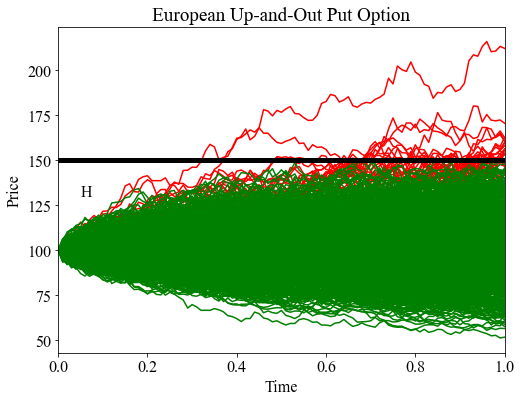

In [88]:
plt.figure(figsize=(8,6))

plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = "16"

plt.plot(np.linspace(0,T,N+1),S[:,mask],'r')
plt.plot(np.linspace(0,T,N+1),S[:,~mask],'g')
plt.plot([0,T],[H,H], 'k-',linewidth=5.0)
plt.annotate('H', (0.05,130))
plt.xlim(0,1)
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('European Up-and-Out Put Option')

plt.show()

### Up-and-in Put Option

In [89]:
start_time = time.time()

# Precompute constants
dt = T/N
nudt = (r - 0.5*vol**2)*dt
volsdt = vol*np.sqrt(dt)
erdt = np.exp(r*dt)

# Monte Carlo Method
Z = np.random.normal(size=(N, M))
delta_St = nudt + volsdt*Z
ST = S0 * np.cumprod(np.exp(delta_St), axis=0)
ST = np.concatenate((np.full(shape=(1, M), fill_value=S0), ST))

# Copy numpy array for plotting
S = np.copy(ST)

# Apply Barrier Condition for an Up-and-In Option
mask = np.any(ST >= H, axis=0)  # Select paths that hit the barrier
ST[:, ~mask] = 0                 # Set paths that did NOT hit barrier to zero

# Calculate payoff only for paths that hit the barrier
CT = np.maximum(0, K - ST[-1][mask])  # Calculate put payoff (K - ST) for valid paths
C0 = np.exp(-r*T) * np.sum(CT) / M    # Discounted payoff average

# Calculate standard error
sigma = np.std(np.exp(-r*T) * CT) if CT.size > 0 else 0
SE = sigma / np.sqrt(M)

print("Put value is ${0} with SE +/- {1}".format(np.round(C0, 2), np.round(SE, 3)))
print("Computation time is: ", round(time.time() - start_time, 4))

Put value is $0.0 with SE +/- 0.0
Computation time is:  0.0157


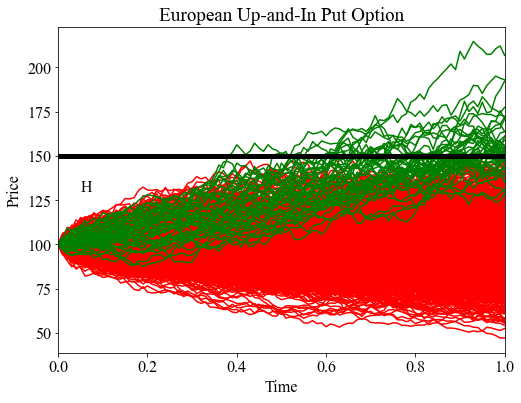

In [90]:
plt.figure(figsize=(8,6))

plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = "16"

plt.plot(np.linspace(0,T,N+1),S[:,~mask],'r')
plt.plot(np.linspace(0,T,N+1),S[:,mask],'g')
plt.plot([0,T],[H,H], 'k-',linewidth=5.0)
plt.annotate('H', (0.05,130))
plt.xlim(0,1)
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('European Up-and-In Put Option')

plt.show()

## 'Down' Barrier Options

In [91]:
# Initialise parameters
S0 = 100      # initial stock price
K = 100       # strike price
T = 1         # time to maturity in years
H = 75       # up-and-out barrier price/value
r = 0.01      # annual risk-free rate
vol = 0.2     # volatility (%)

N = 100       # number of time steps
M = 1000      # number of simulations

### Down-and-out Put Option

In [92]:
start_time = time.time()

#precompute constants
dt = T/N
nudt = (r - 0.5*vol**2)*dt
volsdt = vol*np.sqrt(dt)
erdt = np.exp(r*dt)

# Monte Carlo Method
Z = np.random.normal(size=(N, M))
delta_St = nudt + volsdt*Z
ST = S0*np.cumprod( np.exp(delta_St), axis=0)
ST = np.concatenate( (np.full(shape=(1, M), fill_value=S0), ST ) )

# Copy numpy array for plotting
S = np.copy(ST)

# Apply Barrier Condition to ST numpy array
mask = np.any(ST <= H, axis=0)
ST[:,mask] = 0

CT = np.maximum(0, K - ST[-1][ST[-1] != 0])
C0 = np.exp(-r*T)*np.sum(CT)/M

sigma = np.sqrt( np.sum( (np.exp(-r*T)*CT - C0)**2) / (M-1) )
sigma = np.std(np.exp(-r*T)*CT)
SE = sigma/np.sqrt(M)

print("Call value is ${0} with SE +/- {1}".format(np.round(C0,2),np.round(SE,3)))
print("Computation time is: ", round(time.time() - start_time,4))

Call value is $3.69 with SE +/- 0.204
Computation time is:  0.0074


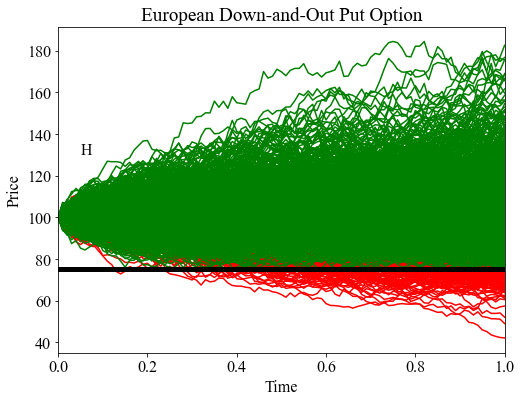

In [93]:
plt.figure(figsize=(8,6))

plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = "16"

plt.plot(np.linspace(0,T,N+1),S[:,mask],'r')
plt.plot(np.linspace(0,T,N+1),S[:,~mask],'g')
plt.plot([0,T],[H,H], 'k-',linewidth=5.0)
plt.annotate('H', (0.05,130))
plt.xlim(0,1)
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('European Down-and-Out Put Option')

plt.show()

### Down-and-in Put Option

In [94]:
start_time = time.time()

#precompute constants
dt = T/N
nudt = (r - 0.5*vol**2)*dt
volsdt = vol*np.sqrt(dt)
erdt = np.exp(r*dt)

# Monte Carlo Method
Z = np.random.normal(size=(N, M))
delta_St = nudt + volsdt*Z
ST = S0*np.cumprod( np.exp(delta_St), axis=0)
ST = np.concatenate( (np.full(shape=(1, M), fill_value=S0), ST ) )

# Copy numpy array for plotting
S = np.copy(ST)

# Apply Barrier Condition to ST numpy array
mask = np.any(ST <= H, axis=0)
ST[:,~mask] = 0

CT = np.maximum(0, K - ST[-1][ST[-1] != 0])
C0 = np.exp(-r*T)*np.sum(CT)/M

sigma = np.sqrt( np.sum( (np.exp(-r*T)*CT - C0)**2) / (M-1) )
sigma = np.std(np.exp(-r*T)*CT)
SE = sigma/np.sqrt(M)

print("Call value is ${0} with SE +/- {1}".format(np.round(C0,2),np.round(SE,3)))
print("Computation time is: ", round(time.time() - start_time,4))

Call value is $3.7 with SE +/- 0.267
Computation time is:  0.0076


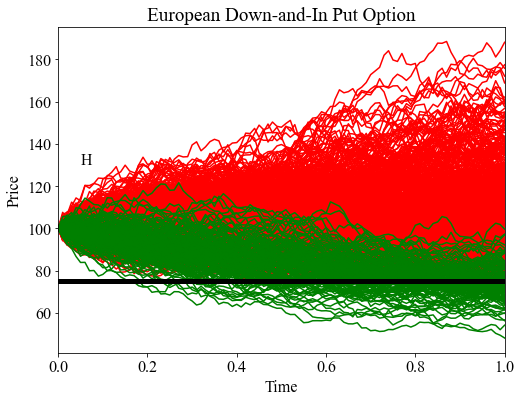

In [95]:
plt.figure(figsize=(8,6))

plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = "16"

plt.plot(np.linspace(0,T,N+1),S[:,~mask],'r')
plt.plot(np.linspace(0,T,N+1),S[:,mask],'g')
plt.plot([0,T],[H,H], 'k-',linewidth=5.0)
plt.annotate('H', (0.05,130))
plt.xlim(0,1)
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('European Down-and-In Put Option')

plt.show()

# Call Barrier Options

## 'Up' Barrier Options

In [116]:
# Initialise parameters
S0 = 100      # initial stock price
K = 100       # strike price
T = 1         # time to maturity in years
H = 150       # up-and-out barrier price/value
r = 0.01      # annual risk-free rate
vol = 0.2     # volatility (%)

N = 100       # number of time steps
M = 1000      # number of simulations

### Up-and-Out Call Option

In [117]:
start_time = time.time()

#precompute constants
dt = T/N
nudt = (r - 0.5*vol**2)*dt
volsdt = vol*np.sqrt(dt)
erdt = np.exp(r*dt)

# Monte Carlo Method
Z = np.random.normal(size=(N, M))
delta_St = nudt + volsdt*Z
ST = S0*np.cumprod( np.exp(delta_St), axis=0)
ST = np.concatenate( (np.full(shape=(1, M), fill_value=S0), ST ) )

# Copy numpy array for plotting
Sorig = np.copy(ST)

# Apply Barrier Condition to ST numpy array
mask = np.any(ST >= H, axis=0)
ST[:,mask] = 0

CT = np.maximum(0, ST[-1][ST[-1] != 0] - K)
C0 = np.exp(-r*T)*np.sum(CT)/M

sigma = np.sqrt( np.sum( (np.exp(-r*T)*CT - C0)**2) / (M-1) )
sigma = np.std(np.exp(-r*T)*CT)
SE = sigma/np.sqrt(M)

print("Call value is ${0} with SE +/- {1}".format(np.round(C0,2),np.round(SE,3)))
print("Computation time is: ", round(time.time() - start_time,4))

Call value is $7.25 with SE +/- 0.349
Computation time is:  0.0115


In [118]:
# Apply Barrier Condition for an Up-and-In Option

ST = np.copy(Sorig)
mask = np.any(ST >= H, axis=0)  # Select paths that hit the barrier
ST[:, ~mask] = 0                 # Set paths that did NOT hit barrier to zero

# Calculate payoff only for paths that hit the barrier
CT = np.maximum(0, ST[-1][mask] - K)  # Calculate put payoff (K - ST) for valid paths
C0 = np.exp(-r*T) * np.sum(CT) / M    # Discounted payoff average

# Calculate standard error
sigma = np.std(np.exp(-r*T) * CT) if CT.size > 0 else 0
SE = sigma / np.sqrt(M)

print("Put value is ${0} with SE +/- {1}".format(np.round(C0, 2), np.round(SE, 3)))
print("Computation time is: ", round(time.time() - start_time, 4))

Put value is $1.34 with SE +/- 0.495
Computation time is:  5.2452


In [119]:

ST = np.copy(Sorig)

# Calculate payoff only for paths that hit the barrier
CT = np.maximum(0, ST[-1] - K)  # Calculate put payoff (K - ST) for valid paths
C0 = np.exp(-r*T) * np.sum(CT) / M    # Discounted payoff average

# Calculate standard error
sigma = np.std(np.exp(-r*T) * CT) if CT.size > 0 else 0
SE = sigma / np.sqrt(M)

print("Put value is ${0} with SE +/- {1}".format(np.round(C0, 2), np.round(SE, 3)))
print("Computation time is: ", round(time.time() - start_time, 4))

Put value is $8.59 with SE +/- 0.417
Computation time is:  8.1852


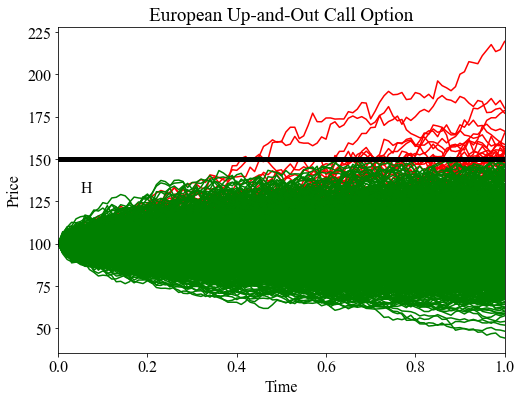

In [98]:
plt.figure(figsize=(8,6))

plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = "16"

plt.plot(np.linspace(0,T,N+1),S[:,mask],'r')
plt.plot(np.linspace(0,T,N+1),S[:,~mask],'g')
plt.plot([0,T],[H,H], 'k-',linewidth=5.0)
plt.annotate('H', (0.05,130))
plt.xlim(0,1)
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('European Up-and-Out Call Option')

plt.show()

### Up-and-In Call Option

In [99]:
start_time = time.time()

# Precompute constants
dt = T/N
nudt = (r - 0.5*vol**2)*dt
volsdt = vol*np.sqrt(dt)
erdt = np.exp(r*dt)

# Monte Carlo Method
Z = np.random.normal(size=(N, M))
delta_St = nudt + volsdt*Z
ST = S0 * np.cumprod(np.exp(delta_St), axis=0)
ST = np.concatenate((np.full(shape=(1, M), fill_value=S0), ST))

# Copy numpy array for plotting
S = np.copy(ST)

# Apply Barrier Condition for an Up-and-In Option
mask = np.any(ST >= H, axis=0)  # Select paths that hit the barrier
ST[:, ~mask] = 0                 # Set paths that did NOT hit barrier to zero

# Calculate payoff only for paths that hit the barrier
CT = np.maximum(0, ST[-1][mask] - K)  # Calculate put payoff (K - ST) for valid paths
C0 = np.exp(-r*T) * np.sum(CT) / M    # Discounted payoff average

# Calculate standard error
sigma = np.std(np.exp(-r*T) * CT) if CT.size > 0 else 0
SE = sigma / np.sqrt(M)

print("Put value is ${0} with SE +/- {1}".format(np.round(C0, 2), np.round(SE, 3)))
print("Computation time is: ", round(time.time() - start_time, 4))

Put value is $2.6 with SE +/- 0.516
Computation time is:  0.0066


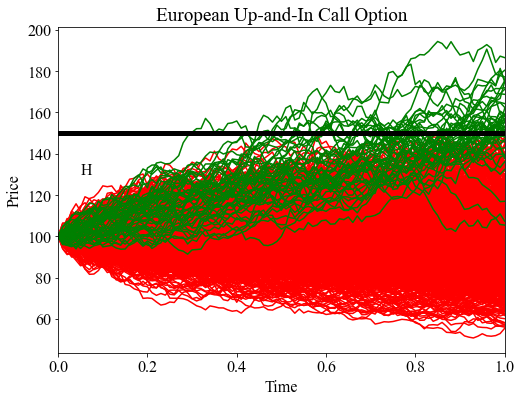

In [100]:
plt.figure(figsize=(8,6))

plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = "16"

plt.plot(np.linspace(0,T,N+1),S[:,~mask],'r')
plt.plot(np.linspace(0,T,N+1),S[:,mask],'g')
plt.plot([0,T],[H,H], 'k-',linewidth=5.0)
plt.annotate('H', (0.05,130))
plt.xlim(0,1)
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('European Up-and-In Call Option')

plt.show()

## 'Down' Barrier Options

In [106]:
# Initialise parameters
S0 = 100      # initial stock price
K = 100       # strike price
T = 1         # time to maturity in years
H = 75       # up-and-out barrier price/value
r = 0.01      # annual risk-free rate
vol = 0.2     # volatility (%)

N = 100       # number of time steps
M = 1000      # number of simulations

### Down-and-out Call Option

In [102]:
start_time = time.time()

#precompute constants
dt = T/N
nudt = (r - 0.5*vol**2)*dt
volsdt = vol*np.sqrt(dt)
erdt = np.exp(r*dt)

# Monte Carlo Method
Z = np.random.normal(size=(N, M))
delta_St = nudt + volsdt*Z
ST = S0*np.cumprod( np.exp(delta_St), axis=0)
ST = np.concatenate( (np.full(shape=(1, M), fill_value=S0), ST ) )

# Copy numpy array for plotting
S = np.copy(ST)

# Apply Barrier Condition to ST numpy array
mask = np.any(ST <= H, axis=0)
ST[:,mask] = 0

CT = np.maximum(0, ST[-1][ST[-1] != 0] - K)
C0 = np.exp(-r*T)*np.sum(CT)/M

sigma = np.sqrt( np.sum( (np.exp(-r*T)*CT - C0)**2) / (M-1) )
sigma = np.std(np.exp(-r*T)*CT)
SE = sigma/np.sqrt(M)

print("Call value is ${0} with SE +/- {1}".format(np.round(C0,2),np.round(SE,3)))
print("Computation time is: ", round(time.time() - start_time,4))

Call value is $8.59 with SE +/- 0.451
Computation time is:  0.0075


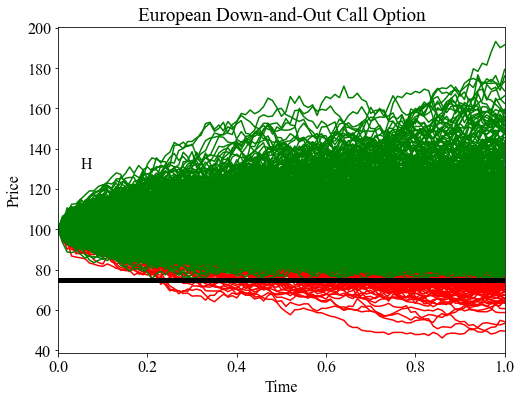

In [103]:
plt.figure(figsize=(8,6))

plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = "16"

plt.plot(np.linspace(0,T,N+1),S[:,mask],'r')
plt.plot(np.linspace(0,T,N+1),S[:,~mask],'g')
plt.plot([0,T],[H,H], 'k-',linewidth=5.0)
plt.annotate('H', (0.05,130))
plt.xlim(0,1)
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('European Down-and-Out Call Option')

plt.show()

### Down-and-in Call Option

In [107]:
start_time = time.time()

#precompute constants
dt = T/N
nudt = (r - 0.5*vol**2)*dt
volsdt = vol*np.sqrt(dt)
erdt = np.exp(r*dt)

# Monte Carlo Method
Z = np.random.normal(size=(N, M))
delta_St = nudt + volsdt*Z
ST = S0*np.cumprod( np.exp(delta_St), axis=0)
ST = np.concatenate( (np.full(shape=(1, M), fill_value=S0), ST ) )

# Copy numpy array for plotting
S = np.copy(ST)

# Apply Barrier Condition to ST numpy array
mask = np.any(ST <= H, axis=0)
ST[:,~mask] = 0

CT = np.maximum(0, ST[-1][ST[-1] != 0] - K)
C0 = np.exp(-r*T)*np.sum(CT)/M

sigma = np.sqrt( np.sum( (np.exp(-r*T)*CT - C0)**2) / (M-1) )
sigma = np.std(np.exp(-r*T)*CT)
SE = sigma/np.sqrt(M)

print("Call value is ${0} with SE +/- {1}".format(np.round(C0,2),np.round(SE,3)))
print("Computation time is: ", round(time.time() - start_time,4))

Call value is $0.01 with SE +/- 0.016
Computation time is:  0.0225


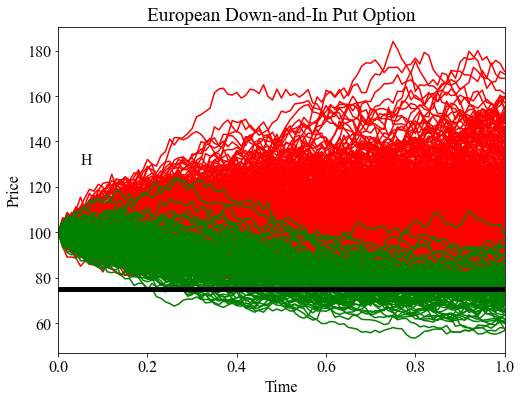

In [105]:
plt.figure(figsize=(8,6))

plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = "16"

plt.plot(np.linspace(0,T,N+1),S[:,~mask],'r')
plt.plot(np.linspace(0,T,N+1),S[:,mask],'g')
plt.plot([0,T],[H,H], 'k-',linewidth=5.0)
plt.annotate('H', (0.05,130))
plt.xlim(0,1)
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('European Down-and-In Put Option')

plt.show()